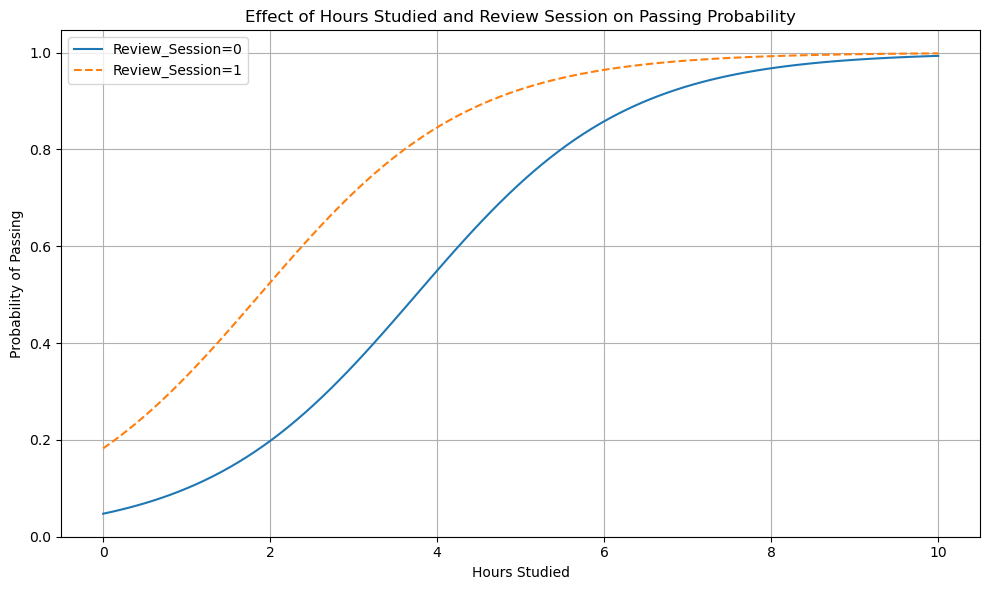

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Define the logistic function
def logistic_function(z):
    return 1 / (1 + np.exp(-z))

# Define the model
def log_odds(hours_studied, review_session):
    return -3 + 0.8 * hours_studied + 1.5 * review_session

# Generate some data
hours_studied = np.linspace(0, 10, 100)

# Calculate log-odds and probabilities for both Review_Session=0 and Review_Session=1
log_odds_0 = log_odds(hours_studied, 0)
probability_0 = logistic_function(log_odds_0)

log_odds_1 = log_odds(hours_studied, 1)
probability_1 = logistic_function(log_odds_1)

# Plot the data
plt.figure(figsize=(10,6))

plt.plot(hours_studied, probability_0, label='Review_Session=0')
plt.plot(hours_studied, probability_1, label='Review_Session=1', linestyle='--')

plt.xlabel('Hours Studied')
plt.ylabel('Probability of Passing')
plt.title('Effect of Hours Studied and Review Session on Passing Probability')
plt.legend()

plt.grid(True)
plt.tight_layout()
plt.show()


# Task 1b 

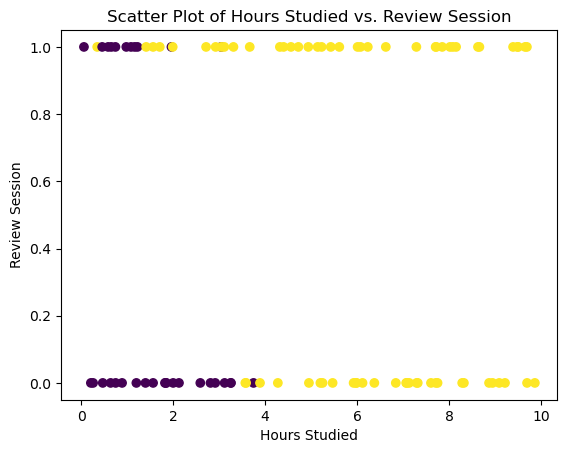

Coefficients: Hours_Studied = 1.364992147918139
Review_Session = 1.8773375560380907
Intercept = -4.611824619845847
Accuracy: 0.9300
AUC: 0.9761


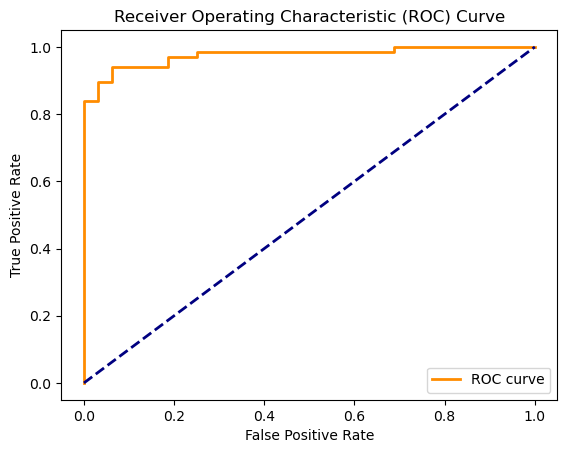

In [10]:
# Step 1: Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve

# Step 2: Load the dataset
data = pd.read_csv('student_data.csv')

# Step 3: Explore the data (visualization)
# You can use scatter plots, histograms, etc. to visualize the data and relationships between variables.

# Example (scatter plot of Hours_Studied vs. Review_Session):
plt.scatter(data['Hours_Studied'], data['Review_Session'], c=data['Results'], cmap='viridis')
plt.xlabel('Hours Studied')
plt.ylabel('Review Session')
plt.title('Scatter Plot of Hours Studied vs. Review Session')
plt.show()

# Step 4: Prepare the data for training
X = data[['Hours_Studied', 'Review_Session']]
y = data['Results']

# Step 5: Create and train the logistic regression model
model = LogisticRegression()
model.fit(X, y)

# Step 6: Output model coefficients
coef_hours_studied, coef_review_session = model.coef_[0]
intercept = model.intercept_[0]

print(f'Coefficients: Hours_Studied = {coef_hours_studied}\nReview_Session = {coef_review_session}\nIntercept = {intercept}')

# Step 7: Make predictions on the same dataset
y_pred = model.predict(X)

# Step 8: Calculate performance metrics
accuracy = accuracy_score(y, y_pred)
y_proba = model.predict_proba(X)[:, 1]  # Probabilities of class 1
roc_auc = roc_auc_score(y, y_proba)

print(f'Accuracy: {accuracy:.4f}')
print(f'AUC: {roc_auc:.4f}')

# Step 9: Plot ROC curve
fpr, tpr, _ = roc_curve(y, y_proba)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


# Task 2 

In [20]:
import pandas as pd
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score

# Step 1: Load and prepare the data
data = pd.read_csv('student_data.csv')
X = data[['Hours_Studied', 'Review_Session']]
y = data['Results']

# Step 2: Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Define the hyperparameter space for C and gamma
param_grid = {'C': [0.1, 1, 10],
              'gamma': [0.01, 0.1, 1]}

# Step 4: Perform grid search
svm = SVC(kernel='rbf')
grid_search = GridSearchCV(svm, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_c = grid_search.best_params_['C']
best_gamma = grid_search.best_params_['gamma']

# Step 5: Train the SVM with the best hyperparameters
svm_best = SVC(kernel='rbf', C=best_c, gamma=best_gamma)
svm_best.fit(X_train, y_train)

# Step 6: Evaluate the model
y_pred = svm_best.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print(f'Best Hyperparameters - C: {best_c}, gamma: {best_gamma}')
print(f'Accuracy: {accuracy:.4f}')


Best Hyperparameters - C: 1, gamma: 1
Accuracy: 0.8500


/Users/harshithmartha/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/Users/harshithmartha/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/Users/harshithmartha/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/Users/harshithmartha/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


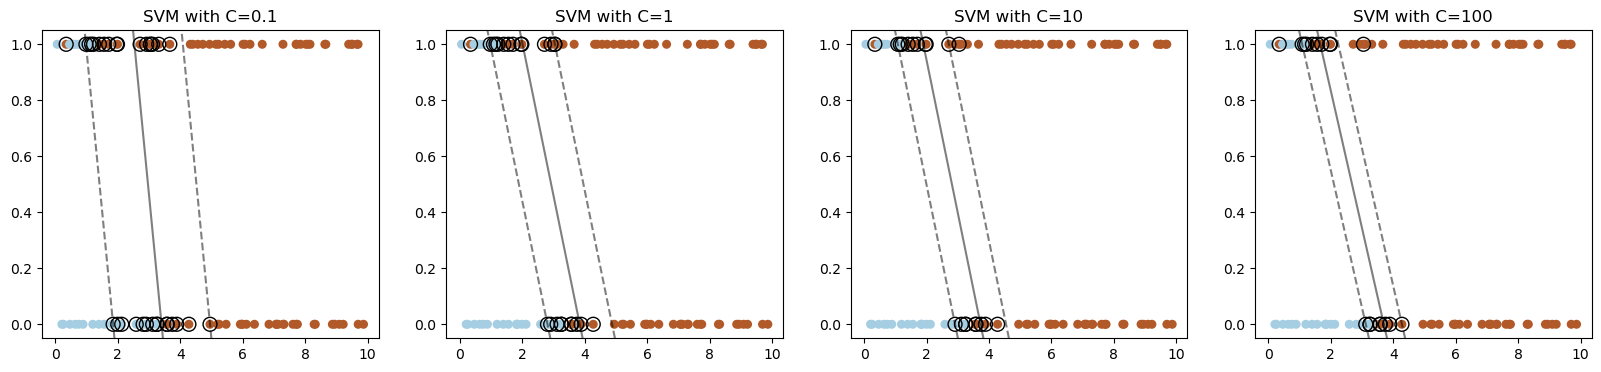

/Users/harshithmartha/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/Users/harshithmartha/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/Users/harshithmartha/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/Users/harshithmartha/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


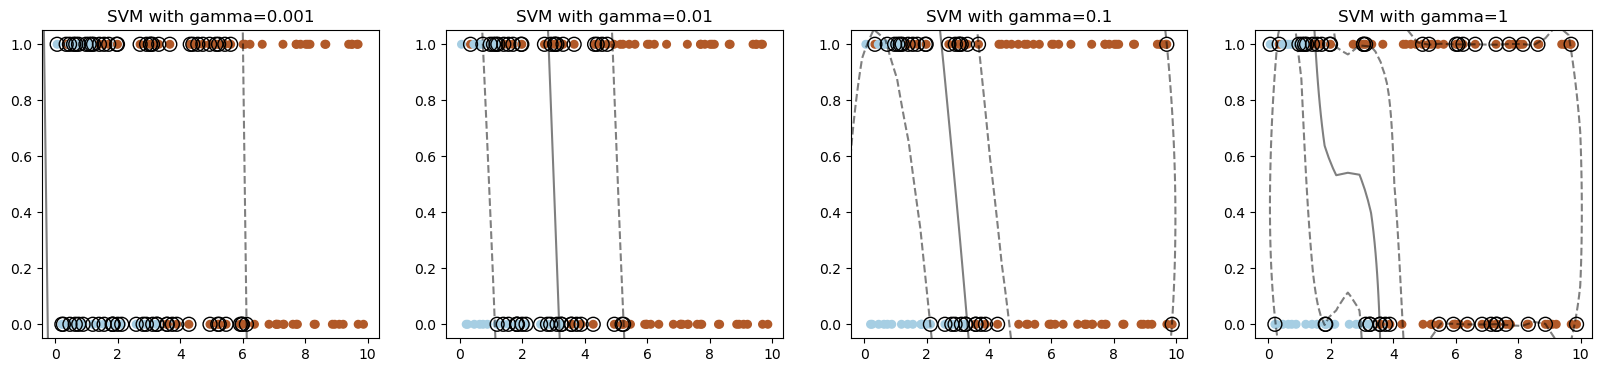

In [21]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC

# Load your dataset and prepare X, y (assuming you've already done this)

# Define a function to plot the decision function
def plot_decision_function(model, ax):
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    xx = np.linspace(xlim[0], xlim[1], 30)
    yy = np.linspace(ylim[0], ylim[1], 30)
    YY, XX = np.meshgrid(yy, xx)
    xy = np.vstack([XX.ravel(), YY.ravel()]).T
    Z = model.decision_function(xy).reshape(XX.shape)
    ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5, linestyles=['--', '-', '--'])
    ax.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1], s=100, facecolors='none', edgecolors='k')
    return ax

# Code for SVM with different C values
C_values = [0.1, 1, 10, 100]
models_C = [SVC(kernel='linear', C=C).fit(X, y) for C in C_values]

# Plot the decision boundaries for each model
fig, axes = plt.subplots(1, len(models_C), figsize=(20, 4))

for model, ax, C in zip(models_C, axes, C_values):
    ax.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y, s=30, cmap=plt.cm.Paired)
    ax = plot_decision_function(model, ax)
    ax.set_title(f'SVM with C={C}')

plt.show()

# Code for SVM with different gamma values
gamma_values = [0.001, 0.01, 0.1, 1]
models_gamma = [SVC(kernel='rbf', gamma=gamma).fit(X, y) for gamma in gamma_values]

# Plot the decision boundaries for each model
fig, axes = plt.subplots(1, len(models_gamma), figsize=(20, 4))

for model, ax, gamma in zip(models_gamma, axes, gamma_values):
    ax.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y, s=30, cmap=plt.cm.Paired)
    ax = plot_decision_function(model, ax)
    ax.set_title(f'SVM with gamma={gamma}')

plt.show()
